# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# **Load Data**

In [2]:
#Load the data
data=pd.read_csv('AIDS_Classification_50000.csv')
data

time  trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      1073    1   37   79.46339     0     1      0     100       0    1  ...   
1       324    0   33   73.02314     0     1      0      90       0    1  ...   
2       495    1   43   69.47793     0     1      0     100       0    1  ...   
3      1201    3   42   89.15934     0     1      0     100       1    1  ...   
4       934    0   37  137.46581     0     1      0     100       0    0  ...   
...     ...  ...  ...        ...   ...   ...    ...     ...     ...  ...  ...   
49995   953    3   46   61.28204     0     0      0      90       0    1  ...   
49996  1036    0   42   73.36768     0     1      0     100       0    1  ...   
49997  1157    0   40   78.75824     0     1      0     100       0    1  ...   
49998   596    0   31   52.20371     0     0      0     100       0    1  ...   
49999   612    2   41   77.12100     0     1      0      90       0    1  ...   

       str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0         1      2        0      1       0   322    469   882    754         1  
1         1      3        1      1       1   168    575  1035   1525         1  
2         1      1        0      0       0   377    333  1147   1088         1  
3         1      3        0      0       0   238    324   775   1019         1  
4         0      3        0      0       1   500    443  1601    849         0  
...     ...    ...      ...    ...     ...   ...    ...   ...    ...       ...  
49995     1      3        0      1       1   234    402   481   1014         0  
49996     1      3        0      0       1   369    575   514    657         0  
49997     1      1        0      1       0   308    663  1581    863         0  
49998     1      1        0      1       1   349    440   470    865         1  
49999     1      3        0      1       0   428    396  1002    696         0  

[50000 rows x 23 columns]

# **Data Cleaning and Preprocessing**

In [3]:
#Seperate the features and Label
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print("Features: ")
print(X)
print("Label: ")
print(y)

Features: 
       time  trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      1073    1   37   79.46339     0     1      0     100       0    1  ...   
1       324    0   33   73.02314     0     1      0      90       0    1  ...   
2       495    1   43   69.47793     0     1      0     100       0    1  ...   
3      1201    3   42   89.15934     0     1      0     100       1    1  ...   
4       934    0   37  137.46581     0     1      0     100       0    0  ...   
...     ...  ...  ...        ...   ...   ...    ...     ...     ...  ...  ...   
49995   953    3   46   61.28204     0     0      0      90       0    1  ...   
49996  1036    0   42   73.36768     0     1      0     100       0    1  ...   
49997  1157    0   40   78.75824     0     1      0     100       0    1  ...   
49998   596    0   31   52.20371     0     0      0     100       0    1  ...   
49999   612    2   41   77.12100     0     1      0      90       0    1  ...   

       gender  s

In [5]:
#remove unnecessary columns for better result
columns_to_remove = ['time', 'strat']
df_cleaned = X.drop(columns=columns_to_remove)
df_cleaned

trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  preanti  \
0        1   37   79.46339     0     1      0     100       0    1       18   
1        0   33   73.02314     0     1      0      90       0    1      224   
2        1   43   69.47793     0     1      0     100       0    1        0   
3        3   42   89.15934     0     1      0     100       1    1      513   
4        0   37  137.46581     0     1      0     100       0    0        4   
...    ...  ...        ...   ...   ...    ...     ...     ...  ...      ...   
49995    3   46   61.28204     0     0      0      90       0    1     1089   
49996    0   42   73.36768     0     1      0     100       0    1      312   
49997    0   40   78.75824     0     1      0     100       0    1        0   
49998    0   31   52.20371     0     0      0     100       0    1        0   
49999    2   41   77.12100     0     1      0      90       0    1     1346   

       race  gender  str2  symptom  treat  offtrt  cd40  cd420  cd80  cd820  
0         0       1     1        0      1       0   322    469   882    754  
1         0       1     1        1      1       1   168    575  1035   1525  
2         0       0     1        0      0       0   377    333  1147   1088  
3         0       1     1        0      0       0   238    324   775   1019  
4         0       1     0        0      0       1   500    443  1601    849  
...     ...     ...   ...      ...    ...     ...   ...    ...   ...    ...  
49995     0       0     1        0      1       1   234    402   481   1014  
49996     1       1     1        0      0       1   369    575   514    657  
49997     0       1     1        0      1       0   308    663  1581    863  
49998     1       0     1        0      1       1   349    440   470    865  
49999     0       1     1        0      1       0   428    396  1002    696  

[50000 rows x 20 columns]

In [144]:
#Scale some columns to remove biasness in Dataset
scaler = MinMaxScaler()
columns_to_normalize = ['age', 'wtkg', 'karnof', 'preanti', 'z30', 'cd40', 'cd420', 'cd80', 'cd820']
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])
df_cleaned

trt       age      wtkg  hemo  homo  drugs    karnof  oprior  z30  \
0        1  0.446429  0.345231     0     1      0  1.000000       0  1.0   
1        0  0.375000  0.285305     0     1      0  0.583333       0  1.0   
2        1  0.553571  0.252317     0     1      0  1.000000       0  1.0   
3        3  0.535714  0.435452     0     1      0  1.000000       1  1.0   
4        0  0.446429  0.884943     0     1      0  1.000000       0  0.0   
...    ...       ...       ...   ...   ...    ...       ...     ...  ...   
49995    3  0.607143  0.176054     0     0      0  0.583333       0  1.0   
49996    0  0.535714  0.288511     0     1      0  1.000000       0  1.0   
49997    0  0.500000  0.338670     0     1      0  1.000000       0  1.0   
49998    0  0.339286  0.091581     0     0      0  1.000000       0  1.0   
49999    2  0.517857  0.323436     0     1      0  0.583333       0  1.0   

        preanti  race  gender  str2  symptom  treat  offtrt      cd40  \
0      0.006365     0       1     1        0      1       0  0.346237   
1      0.079208     0       1     1        1      1       1  0.180645   
2      0.000000     0       0     1        0      0       0  0.405376   
3      0.181400     0       1     1        0      0       0  0.255914   
4      0.001414     0       1     0        0      0       1  0.537634   
...         ...   ...     ...   ...      ...    ...     ...       ...   
49995  0.385078     0       0     1        0      1       1  0.251613   
49996  0.110325     1       1     1        0      0       1  0.396774   
49997  0.000000     0       1     1        0      1       0  0.331183   
49998  0.000000     1       0     1        0      1       1  0.375269   
49999  0.475955     0       1     1        0      1       0  0.460215   

          cd420      cd80     cd820  
0      0.373796  0.172368  0.172660  
1      0.475915  0.205921  0.401783  
2      0.242775  0.230482  0.271917  
3      0.234104  0.148904  0.251412  
4      0.348748  0.330044  0.200892  
...         ...       ...       ...  
49995  0.309249  0.084430  0.249926  
49996  0.475915  0.091667  0.143834  
49997  0.560694  0.325658  0.205052  
49998  0.345857  0.082018  0.205646  
49999  0.303468  0.198684  0.155423  

[50000 rows x 20 columns]

In [145]:
#Remove Duplicate, if exist
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

trt       age      wtkg  hemo  homo  drugs    karnof  oprior  z30  \
0        1  0.446429  0.345231     0     1      0  1.000000       0  1.0   
1        0  0.375000  0.285305     0     1      0  0.583333       0  1.0   
2        1  0.553571  0.252317     0     1      0  1.000000       0  1.0   
3        3  0.535714  0.435452     0     1      0  1.000000       1  1.0   
4        0  0.446429  0.884943     0     1      0  1.000000       0  0.0   
...    ...       ...       ...   ...   ...    ...       ...     ...  ...   
49995    3  0.607143  0.176054     0     0      0  0.583333       0  1.0   
49996    0  0.535714  0.288511     0     1      0  1.000000       0  1.0   
49997    0  0.500000  0.338670     0     1      0  1.000000       0  1.0   
49998    0  0.339286  0.091581     0     0      0  1.000000       0  1.0   
49999    2  0.517857  0.323436     0     1      0  0.583333       0  1.0   

        preanti  race  gender  str2  symptom  treat  offtrt      cd40  \
0      0.006365     0       1     1        0      1       0  0.346237   
1      0.079208     0       1     1        1      1       1  0.180645   
2      0.000000     0       0     1        0      0       0  0.405376   
3      0.181400     0       1     1        0      0       0  0.255914   
4      0.001414     0       1     0        0      0       1  0.537634   
...         ...   ...     ...   ...      ...    ...     ...       ...   
49995  0.385078     0       0     1        0      1       1  0.251613   
49996  0.110325     1       1     1        0      0       1  0.396774   
49997  0.000000     0       1     1        0      1       0  0.331183   
49998  0.000000     1       0     1        0      1       1  0.375269   
49999  0.475955     0       1     1        0      1       0  0.460215   

          cd420      cd80     cd820  
0      0.373796  0.172368  0.172660  
1      0.475915  0.205921  0.401783  
2      0.242775  0.230482  0.271917  
3      0.234104  0.148904  0.251412  
4      0.348748  0.330044  0.200892  
...         ...       ...       ...  
49995  0.309249  0.084430  0.249926  
49996  0.475915  0.091667  0.143834  
49997  0.560694  0.325658  0.205052  
49998  0.345857  0.082018  0.205646  
49999  0.303468  0.198684  0.155423  

[50000 rows x 20 columns]

In [146]:
#Check Null values in all columns
df_cleaned.isnull().sum()

trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
str2       0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

In [147]:
#To get all the info of DataFrame
df_cleaned.describe()

trt           age          wtkg          hemo          homo  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       1.384800      0.395786      0.311721      0.033480      0.653540   
std        1.233272      0.126628      0.111927      0.179888      0.475847   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.303571      0.240925      0.000000      0.000000   
50%        1.000000      0.392857      0.294898      0.000000      1.000000   
75%        3.000000      0.482143      0.360853      0.000000      1.000000   
max        3.000000      1.000000      1.000000      1.000000      1.000000   

              drugs        karnof        oprior           z30       preanti  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.132220      0.867982      0.042300      0.640880      0.112503   
std        0.338733      0.212158      0.201275      0.479747      0.142480   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.583333      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      1.000000      0.043494   
75%        0.000000      1.000000      0.000000      1.000000      0.177864   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               race        gender          str2       symptom         treat  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.293300      0.856700      0.575200      0.083460      0.734160   
std        0.455279      0.350382      0.494318      0.276579      0.441784   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      1.000000      0.000000      1.000000   
75%        1.000000      1.000000      1.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             offtrt          cd40         cd420          cd80         cd820  
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000  
mean       0.342220      0.343096      0.344017      0.208319      0.217812  
std        0.474458      0.110243      0.139506      0.107153      0.100953  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.253763      0.236994      0.135307      0.141456  
50%        0.000000      0.321505      0.321773      0.173026      0.203566  
75%        1.000000      0.425806      0.433526      0.251974      0.270728  
max        1.000000      1.000000      1.000000      1.000000      1.000000

In [148]:
#to get the shape of the DataFrame
df_cleaned.shape

(50000, 20)

In [149]:
#to get the index of the DataFrame
df_cleaned.index

RangeIndex(start=0, stop=50000, step=1)

In [150]:
#to get the column names of the DataFrame
df_cleaned.columns

Index(['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [151]:
#to get the types of columns of the DataFrame
df_cleaned.dtypes

trt          int64
age        float64
wtkg       float64
hemo         int64
homo         int64
drugs        int64
karnof     float64
oprior       int64
z30        float64
preanti    float64
race         int64
gender       int64
str2         int64
symptom      int64
treat        int64
offtrt       int64
cd40       float64
cd420      float64
cd80       float64
cd820      float64
dtype: object

# **Exploratory Data Analysis (EDA)**

In [152]:
#to calculate the central tendency
central_tendency = {
    'mean': df_cleaned.mean(),
    'median': df_cleaned.median(),
    'mode': df_cleaned.mode().iloc[0] #to select the first mode
}
central_tendency

{'mean': trt        1.384800
 age        0.395786
 wtkg       0.311721
 hemo       0.033480
 homo       0.653540
 drugs      0.132220
 karnof     0.867982
 oprior     0.042300
 z30        0.640880
 preanti    0.112503
 race       0.293300
 gender     0.856700
 str2       0.575200
 symptom    0.083460
 treat      0.734160
 offtrt     0.342220
 cd40       0.343096
 cd420      0.344017
 cd80       0.208319
 cd820      0.217812
 dtype: float64,
 'median': trt        1.000000
 age        0.392857
 wtkg       0.294898
 hemo       0.000000
 homo       1.000000
 drugs      0.000000
 karnof     1.000000
 oprior     0.000000
 z30        1.000000
 preanti    0.043494
 race       0.000000
 gender     1.000000
 str2       1.000000
 symptom    0.000000
 treat      1.000000
 offtrt     0.000000
 cd40       0.321505
 cd420      0.321773
 cd80       0.173026
 cd820      0.203566
 dtype: float64,
 'mode': trt        0.000000
 age        0.428571
 wtkg       0.273880
 hemo       0.000000
 homo       1.00

In [153]:
#to calculate dispersion
dispersion = {
    'std_dev': df_cleaned.std(),
    'variance': df_cleaned.var(),
    'range': df_cleaned.max() - df_cleaned.min()
}
dispersion

{'std_dev': trt        1.233272
 age        0.126628
 wtkg       0.111927
 hemo       0.179888
 homo       0.475847
 drugs      0.338733
 karnof     0.212158
 oprior     0.201275
 z30        0.479747
 preanti    0.142480
 race       0.455279
 gender     0.350382
 str2       0.494318
 symptom    0.276579
 treat      0.441784
 offtrt     0.474458
 cd40       0.110243
 cd420      0.139506
 cd80       0.107153
 cd820      0.100953
 dtype: float64,
 'variance': trt        1.520959
 age        0.016035
 wtkg       0.012528
 hemo       0.032360
 homo       0.226430
 drugs      0.114740
 karnof     0.045011
 oprior     0.040512
 z30        0.230157
 preanti    0.020300
 race       0.207279
 gender     0.122768
 str2       0.244350
 symptom    0.076496
 treat      0.195173
 offtrt     0.225110
 cd40       0.012154
 cd420      0.019462
 cd80       0.011482
 cd820      0.010192
 dtype: float64,
 'range': trt        3.0
 age        1.0
 wtkg       1.0
 hemo       1.0
 homo       1.0
 drugs      1.

In [154]:
# Correlation analysis
correlation_matrix = df_cleaned.corr()
correlation_matrix

trt       age      wtkg      hemo      homo     drugs    karnof  \
trt      1.000000  0.040517  0.010247  0.002240  0.064000 -0.005980 -0.038132   
age      0.040517  1.000000  0.001856 -0.017836  0.108080  0.002495 -0.046430   
wtkg     0.010247  0.001856  1.000000 -0.034036  0.089131 -0.016851  0.008592   
hemo     0.002240 -0.017836 -0.034036  1.000000 -0.068466  0.001203 -0.002599   
homo     0.064000  0.108080  0.089131 -0.068466  1.000000 -0.051067 -0.011770   
drugs   -0.005980  0.002495 -0.016851  0.001203 -0.051067  1.000000  0.010188   
karnof  -0.038132 -0.046430  0.008592 -0.002599 -0.011770  0.010188  1.000000   
oprior  -0.004581  0.011142 -0.004932  0.013915  0.008095 -0.010457  0.000356   
z30     -0.001674  0.118811 -0.106208  0.064002 -0.013145 -0.033090 -0.131726   
preanti  0.001603  0.093419 -0.066063  0.043161  0.014152 -0.034399 -0.090110   
race    -0.067184 -0.075247 -0.045631  0.008795 -0.178007  0.047854  0.034598   
gender   0.039346  0.034213  0.067468 -0.015268  0.192607 -0.025554 -0.002476   
str2     0.000497  0.121492 -0.104913  0.062104 -0.010187 -0.040928 -0.136562   
symptom -0.018105  0.001566  0.004827 -0.002698  0.022002  0.000906  0.008108   
treat    0.232762  0.041837  0.001226  0.008057  0.072673 -0.009026 -0.053328   
offtrt  -0.027697 -0.049142 -0.029979  0.011043 -0.103003  0.037158 -0.025224   
cd40     0.013352 -0.053918  0.047813 -0.034345  0.000200  0.025400  0.045776   
cd420    0.028357 -0.065441  0.066893 -0.034451 -0.010264  0.027702  0.062692   
cd80    -0.004262  0.005863  0.019929 -0.004844  0.025367 -0.005788  0.023325   
cd820    0.019198 -0.001756 -0.006143 -0.004207 -0.004070  0.006794  0.013964   

           oprior       z30   preanti      race    gender      str2   symptom  \
trt     -0.004581 -0.001674  0.001603 -0.067184  0.039346  0.000497 -0.018105   
age      0.011142  0.118811  0.093419 -0.075247  0.034213  0.121492  0.001566   
wtkg    -0.004932 -0.106208 -0.066063 -0.045631  0.067468 -0.104913  0.004827   
hemo     0.013915  0.064002  0.043161  0.008795 -0.015268  0.062104 -0.002698   
homo     0.008095 -0.013145  0.014152 -0.178007  0.192607 -0.010187  0.022002   
drugs   -0.010457 -0.033090 -0.034399  0.047854 -0.025554 -0.040928  0.000906   
karnof   0.000356 -0.131726 -0.090110  0.034598 -0.002476 -0.136562  0.008108   
oprior   1.000000  0.058107  0.046862 -0.018406  0.002859  0.065423  0.017419   
z30      0.058107  1.000000  0.425415 -0.092531 -0.024403  0.605567  0.022249   
preanti  0.046862  0.425415  1.000000 -0.085702 -0.002565  0.454841  0.021176   
race    -0.018406 -0.092531 -0.085702  1.000000 -0.135722 -0.108093 -0.014762   
gender   0.002859 -0.024403 -0.002565 -0.135722  1.000000 -0.026755  0.003507   
str2     0.065423  0.605567  0.454841 -0.108093 -0.026755  1.000000  0.035796   
symptom  0.017419  0.022249  0.021176 -0.014762  0.003507  0.035796  1.000000   
treat   -0.011640  0.010907  0.023678 -0.076016  0.050424  0.021574 -0.033662   
offtrt  -0.008963 -0.007565 -0.011919  0.069752 -0.082171  0.000576  0.000902   
cd40    -0.041128 -0.217151 -0.183870  0.025204  0.015011 -0.236247 -0.017497   
cd420   -0.042355 -0.284487 -0.234264  0.051497  0.016715 -0.301199 -0.031488   
cd80     0.006786 -0.018809 -0.020495 -0.028821  0.021179 -0.023728  0.005385   
cd820   -0.010503  0.001278 -0.000010  0.001239  0.005211 -0.000718  0.020110   

            treat    offtrt      cd40     cd420      cd80     cd820  
trt      0.232762 -0.027697  0.013352  0.028357 -0.004262  0.019198  
age      0.041837 -0.049142 -0.053918 -0.065441  0.005863 -0.001756  
wtkg     0.001226 -0.029979  0.047813  0.066893  0.019929 -0.006143  
hemo     0.008057  0.011043 -0.034345 -0.034451 -0.004844 -0.004207  
homo     0.072673 -0.103003  0.000200 -0.010264  0.025367 -0.004070  
drugs   -0.009026  0.037158  0.025400  0.027702 -0.005788  0.006794  
karnof  -0.053328 -0.025224  0.045776  0.062692  0.023325  0.013964  
oprior  -0.011640 -0.008963 -0.041128 -0.042355  0

In [155]:
# Grouping by treatment group ('trt') and calculating mean for each group
grouped_by_treatment = data.groupby('trt').mean()
grouped_by_treatment

time        age       wtkg      hemo      homo     drugs  \
trt                                                                   
0    852.408563  33.795396  75.760024  0.033186  0.613705  0.136618   
1    900.863591  34.159120  76.075384  0.031598  0.669770  0.125123   
2    884.648899  34.433648  75.404986  0.035166  0.664076  0.130391   
3    893.567010  34.458151  76.255793  0.033523  0.691408  0.131355   

        karnof    oprior       z30     preanti  ...      str2     strat  \
trt                                             ...                       
0    97.151355  0.044535  0.647537  319.318578  ...  0.578098  1.939221   
1    96.779800  0.038792  0.601918  298.703202  ...  0.543659  1.876710   
2    96.356746  0.040626  0.662225  334.019804  ...  0.600222  1.982972   
3    96.798416  0.042404  0.635092  314.088803  ...  0.567750  1.926663   

      symptom     treat    offtrt        cd40       cd420         cd80  \
trt                                                                      
0    0.090146  0.580626  0.361284  317.139415  429.362952  1050.524796   
1    0.083228  0.818169  0.321907  321.981521  455.179433  1038.421639   
2    0.077827  0.829632  0.345456  317.474829  437.281973  1043.995651   
3    0.078887  0.824983  0.324058  321.509731  441.778510  1045.117812   

          cd820  infected  
trt                        
0    894.242900  0.347945  
1    919.056002  0.273381  
2    911.879789  0.287433  
3    910.397173  0.295493  

[4 rows x 22 columns]

In [156]:
# Grouping by gender and age group
df_cleaned['age_group'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
grouped_by_gender_age = df_cleaned.groupby(['gender', 'age_group'],observed=True).mean()
grouped_by_gender_age

trt       age      wtkg      hemo      homo     drugs  \
gender age_group                                                               
0      0-20       1.266667  0.106169  0.283496  0.054545  0.315152  0.115152   
       21-30      1.229633  0.264518  0.288700  0.046011  0.358801  0.157873   
       31-40      1.254592  0.418364  0.296886  0.040124  0.456626  0.147217   
       41-50      1.389282  0.562924  0.293743  0.025278  0.504550  0.164813   
       51-60      1.347368  0.749436  0.288381  0.031579  0.568421  0.189474   
       61-70      1.000000  0.904018  0.236122  0.000000  0.750000  0.500000   
1      0-20       1.303932  0.107162  0.319523  0.042508  0.604676  0.120085   
       21-30      1.373298  0.264837  0.315249  0.032955  0.642172  0.132785   
       31-40      1.394938  0.420690  0.314631  0.032713  0.697537  0.125508   
       41-50      1.494555  0.565719  0.314624  0.029331  0.759837  0.129519   
       51-60      1.489583  0.750744  0.309079  0.023810  0.790179  0.162202   
       61-70      1.945946  0.902992  0.291108  0.081081  0.810811  0.081081   

                    karnof    oprior       z30   preanti      race      str2  \
gender age_group                                                               
0      0-20       0.872727  0.078788  0.678788  0.131094  0.430303  0.630303   
       21-30      0.881156  0.037146  0.611228  0.099970  0.494724  0.534825   
       31-40      0.864463  0.042667  0.690308  0.119262  0.426109  0.635208   
       41-50      0.855115  0.035389  0.728008  0.121459  0.401416  0.673407   
       51-60      0.894737  0.063158  0.715789  0.118946  0.347368  0.663158   
       61-70      0.848958  0.000000  0.750000  0.067362  0.375000  0.625000   
1      0-20       0.895501  0.038257  0.562168  0.094115  0.345377  0.499469   
       21-30      0.881701  0.037950  0.554750  0.093856  0.305777  0.483200   
       31-40      0.863726  0.044273  0.656417  0.116841  0.256179  0.592178   
       41-50      0.853625  0.045884  0.716858  0.131375  0.233193  0.654276   
       51-60      0.850074  0.041667  0.745536  0.136326  0.211310  0.662202   
       61-70      0.832207  0.054054  0.756757  0.150780  0.162162  0.756757   

                   symptom     treat    offtrt      cd40     cd420      cd80  \
gender age_group                                                               
0      0-20       0.103030  0.660606  0.484848  0.347084  0.336200  0.197667   
       21-30      0.074293  0.668637  0.452089  0.348570  0.353326  0.199303   
       31-40      0.084487  0.676462  0.439672  0.334783  0.332098  0.204814   
       41-50      0.075834  0.726997  0.390293  0.330959  0.324173  0.205031   
       51-60      0.136842  0.610526  0.421053  0.332677  0.340189  0.195095   
       61-70      0.125000  0.750000  0.250000  0.318145  0.414017  0.242818   
1      0-20       0.090329  0.714134  0.382572  0.343695  0.356036  0.205231   
       21-30      0.084844  0.730964  0.348723  0.352348  0.360860  0.210266   
       31-40      0.083520  0.740302  0.323800  0.341728  0.338571  0.208139   
       41-50      0.081603  0.773631  0.289095  0.336133  0.335623  0.211367   
       51-60      0.090774  0.794643  0.296131  0.331677  0.341241  0.210459   
       61-70      0.081081  0.783784  0.297297  0.320604  0.327345  0.209056   

                     cd820  
gender age_group            
0      0-20       0.218654  
       21-30      0.217908  
       31-40      0.216607  
       41-50      0.212207  
       51-60      0.224638  
       61-70      0.165305  
1      0-20       0.216652  
       21-30      0.218327  
       31-40      0.217880  
       41-50      0.217917  
       51-60      0.220962  
       61-70      0.206931

In [157]:
# Insight into the relationship between age and CD4/CD8 counts
age_cd4_cd8_relationship = data[['age', 'cd40', 'cd420', 'cd80', 'cd820']].corr()
age_cd4_cd8_relationship

age      cd40     cd420      cd80     cd820
age    1.000000 -0.053918 -0.065441  0.005863 -0.001756
cd40  -0.053918  1.000000  0.154333  0.009165  0.009364
cd420 -0.065441  0.154333  1.000000  0.006017  0.022630
cd80   0.005863  0.009165  0.006017  1.000000  0.036548
cd820 -0.001756  0.009364  0.022630  0.036548  1.000000

In [158]:
# Grouping by race and gender and calculating mean for each group
grouped_by_race_gender = data.groupby(['race', 'gender']).mean()
grouped_by_race_gender

time       trt        age       wtkg      hemo      homo  \
race gender                                                                   
0    0       845.375785  1.348154  34.000000  74.468165  0.038433  0.510927   
     1       890.659469  1.449608  34.572240  76.437460  0.031702  0.733144   
1    0       826.535176  1.163631  33.034234  73.139416  0.042399  0.327575   
     1       866.268008  1.281857  33.419389  75.528769  0.034143  0.575995   

                drugs     karnof    oprior       z30  ...      str2     strat  \
race gender                                           ...                       
0    0       0.141422  96.698568  0.042452  0.705853  ...  0.652349  2.080884   
     1       0.119283  96.720546  0.044970  0.664859  ...  0.604197  2.001627   
1    0       0.168342  97.067211  0.038945  0.624058  ...  0.551508  1.833543   
     1       0.154342  97.115495  0.035885  0.557530  ...  0.475830  1.736783   

              symptom     treat    offtrt        cd40       cd420  \
race gender                                                         
0    0       0.086410  0.706858  0.410952  312.621201  424.035669   
     1       0.086050  0.762008  0.309466  318.023474  434.460611   
1    0       0.074435  0.645729  0.470791  318.686872  442.345163   
     1       0.077868  0.692100  0.372180  324.311907  451.695323   

                    cd80       cd820  infected  
race gender                                     
0    0       1033.562422  906.798041  0.340869  
     1       1057.731741  905.523697  0.315590  
1    0       1004.470477  895.124058  0.327889  
     1       1029.514415  909.772145  0.279592  

[4 rows x 21 columns]

In [159]:
# Grouping by age group and treatment group
grouped_by_age_treatment = data.groupby(['age', 'trt']).mean()
grouped_by_age_treatment

time        wtkg      hemo      homo     drugs      karnof  \
age trt                                                                      
12  0     853.714286   75.938506  0.285714  0.428571  0.142857   98.571429   
    2     604.333333   73.537500  0.000000  1.000000  0.000000  100.000000   
    3     940.600000   75.923360  0.000000  0.400000  0.400000   98.000000   
13  0     811.000000   76.695423  0.333333  0.666667  0.000000  100.000000   
    1     872.666667   78.065550  0.000000  0.833333  0.166667   98.333333   
...              ...         ...       ...       ...       ...         ...   
66  0    1144.000000   61.561990  0.000000  1.000000  0.000000   90.000000   
    3    1173.000000   78.845760  0.000000  1.000000  0.000000   90.000000   
67  3    1182.000000  103.258880  0.000000  1.000000  0.000000  100.000000   
68  0     419.000000   69.007800  0.000000  1.000000  1.000000   81.000000   
    3     493.000000   62.703550  0.000000  0.000000  0.000000  100.000000   

           oprior       z30     preanti      race  ...      str2     strat  \
age trt                                            ...                       
12  0    0.142857  0.714286  574.571429  0.714286  ...  0.571429  2.000000   
    2    0.000000  0.333333  496.000000  0.333333  ...  0.333333  1.666667   
    3    0.000000  0.400000  154.600000  0.400000  ...  0.200000  1.600000   
13  0    0.000000  0.666667  407.666667  0.000000  ...  0.666667  2.333333   
    1    0.000000  0.666667  281.000000  0.166667  ...  0.666667  1.666667   
...           ...       ...         ...       ...  ...       ...       ...   
66  0    0.000000  1.000000  834.000000  1.000000  ...  1.000000  3.000000   
    3    0.000000  0.000000    9.000000  0.000000  ...  0.000000  1.000000   
67  3    0.000000  1.000000  144.000000  0.000000  ...  0.000000  1.000000   
68  0    0.000000  1.000000  428.000000  0.000000  ...  1.000000  3.000000   
    3    0.000000  1.000000   92.000000  0.000000  ...  1.000000  3.000000   

          symptom     treat    offtrt        cd40       cd420         cd80  \
age trt                                                                      
12  0    0.000000  0.428571  0.428571  306.571429  376.714286  1048.857143   
    2    0.000000  1.000000  0.333333  273.666667  431.000000  1437.333333   
    3    0.000000  0.800000  0.400000  374.200000  579.000000  1268.000000   
13  0    0.000000  0.333333  0.000000  310.666667  395.333333   894.333333   
    1    0.166667  0.833333  0.333333  323.000000  482.166667   953.000000   
...           ...       ...       ...         ...         ...          ...   
66  0    0.000000  1.000000  1.000000  188.000000  237.000000   963.000000   
    3    0.000000  1.000000  0.000000  295.000000  414.000000   959.000000   
67  3    0.000000  0.000000  1.000000  513.000000  326.000000   699.000000   
68  0    0.000000  1.000000  0.000000  163.000000  587.000000   769.000000   
    3    0.000000  1.000000  0.000000  225.000000  386.000000   760.000000   

               cd820  infected  
age trt                         
12  0     873.000000  0.142857  
    2     973.000000  0.000000  
    3    1011.400000  0.200000  
13  0     631.666667  0.666667  
    1    1014.166667  0.333333  
...              ...       ...  
66  0    2005.000000  1.000000  
    3     891.000000  0.000000  
67  3     552.000000  1.000000  
68  0     760.000000  1.000000  
    3     834.000000  0.000000  

[215 rows x 21 columns]

In [160]:
# Categorizing Karnofsky scores
data['karnof_category'] = pd.cut(data['karnof'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Grouping by Karnofsky score category
grouped_by_karnof = data.groupby('karnof_category',observed=True).mean()
grouped_by_karnof

time       trt        age       wtkg      hemo  \
karnof_category                                                         
Medium           864.406780  1.523540  35.060264  75.185245  0.048964   
High             877.508925  1.383311  34.154400  75.869256  0.033314   

                     homo     drugs     karnof    oprior       z30  ...  \
karnof_category                                                     ...   
Medium           0.612053  0.160075  79.564972  0.030132  0.817326  ...   
High             0.653985  0.131921  97.016899  0.042431  0.638986  ...   

                     str2     strat   symptom     treat    offtrt        cd40  \
karnof_category                                                                 
Medium           0.792844  2.299435  0.079096  0.787194  0.384181  309.199623   
High             0.572864  1.932523  0.083507  0.733591  0.341770  319.185591   

                      cd420         cd80       cd820  infected  
karnof_category                                                 
Medium           416.084746  1015.032015  919.043315  0.338983  
High             438.326305  1046.268168  905.797772  0.309810  

[2 rows x 23 columns]

In [161]:
# Select only numeric columns
numeric_data = df_cleaned.select_dtypes(include=[np.number])

# Convert DataFrame to NumPy array
numeric_data_values = numeric_data.values
# Correlation matrix using NumPy
correlation_matrix = np.corrcoef(numeric_data_values.T)
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_data.columns, columns=numeric_data.columns)

print("\nCorrelation Matrix:")
print(correlation_df)


Correlation Matrix:
              trt       age      wtkg      hemo      homo     drugs    karnof  \
trt      1.000000  0.040517  0.010247  0.002240  0.064000 -0.005980 -0.038132   
age      0.040517  1.000000  0.001856 -0.017836  0.108080  0.002495 -0.046430   
wtkg     0.010247  0.001856  1.000000 -0.034036  0.089131 -0.016851  0.008592   
hemo     0.002240 -0.017836 -0.034036  1.000000 -0.068466  0.001203 -0.002599   
homo     0.064000  0.108080  0.089131 -0.068466  1.000000 -0.051067 -0.011770   
drugs   -0.005980  0.002495 -0.016851  0.001203 -0.051067  1.000000  0.010188   
karnof  -0.038132 -0.046430  0.008592 -0.002599 -0.011770  0.010188  1.000000   
oprior  -0.004581  0.011142 -0.004932  0.013915  0.008095 -0.010457  0.000356   
z30     -0.001674  0.118811 -0.106208  0.064002 -0.013145 -0.033090 -0.131726   
preanti  0.001603  0.093419 -0.066063  0.043161  0.014152 -0.034399 -0.090110   
race    -0.067184 -0.075247 -0.045631  0.008795 -0.178007  0.047854  0.034598   
gender 

In [162]:
df_cleaned.dtypes

trt             int64
age           float64
wtkg          float64
hemo            int64
homo            int64
drugs           int64
karnof        float64
oprior          int64
z30           float64
preanti       float64
race            int64
gender          int64
str2            int64
symptom         int64
treat           int64
offtrt          int64
cd40          float64
cd420         float64
cd80          float64
cd820         float64
age_group    category
dtype: object

# **Data Visualization**

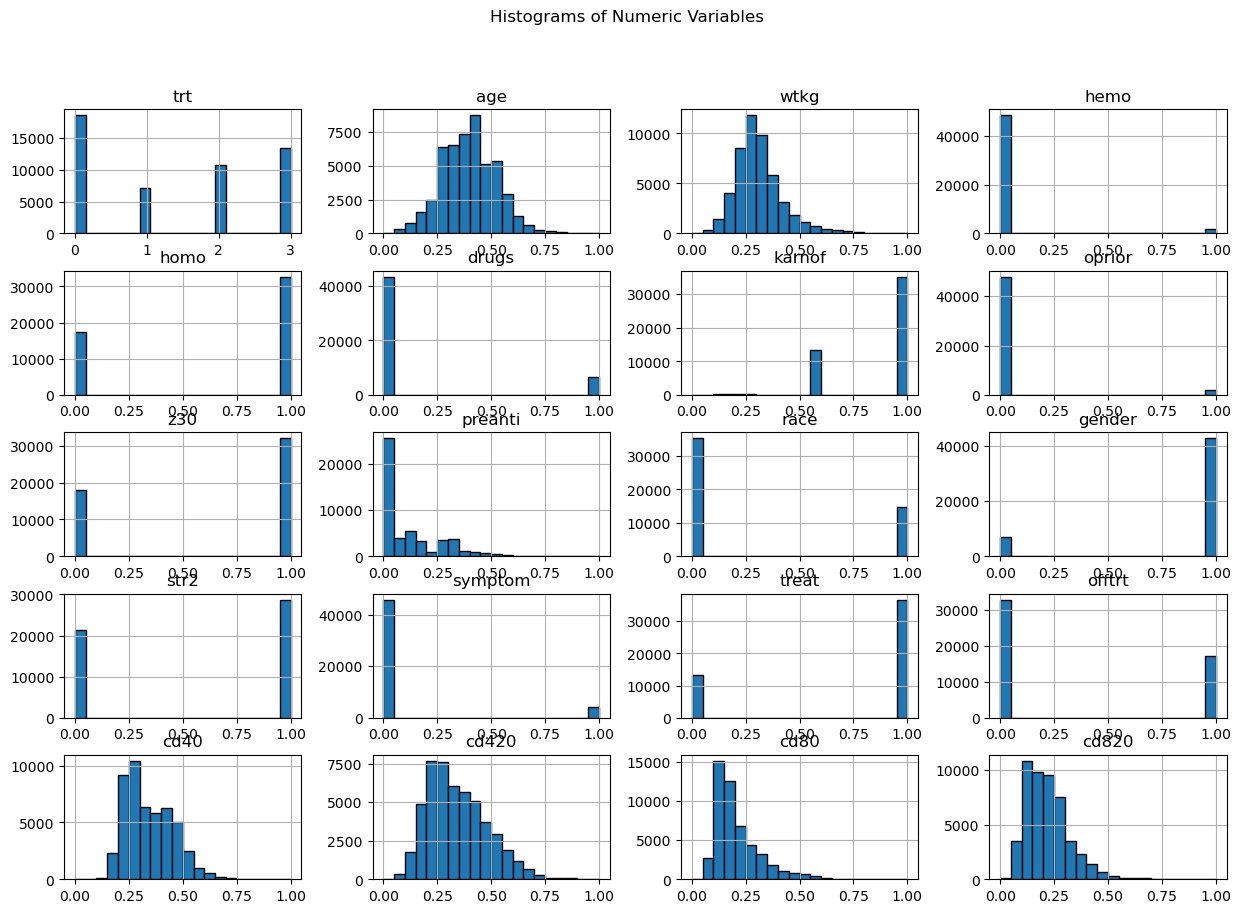

In [163]:
# Plot histograms for each numeric column
numeric_data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

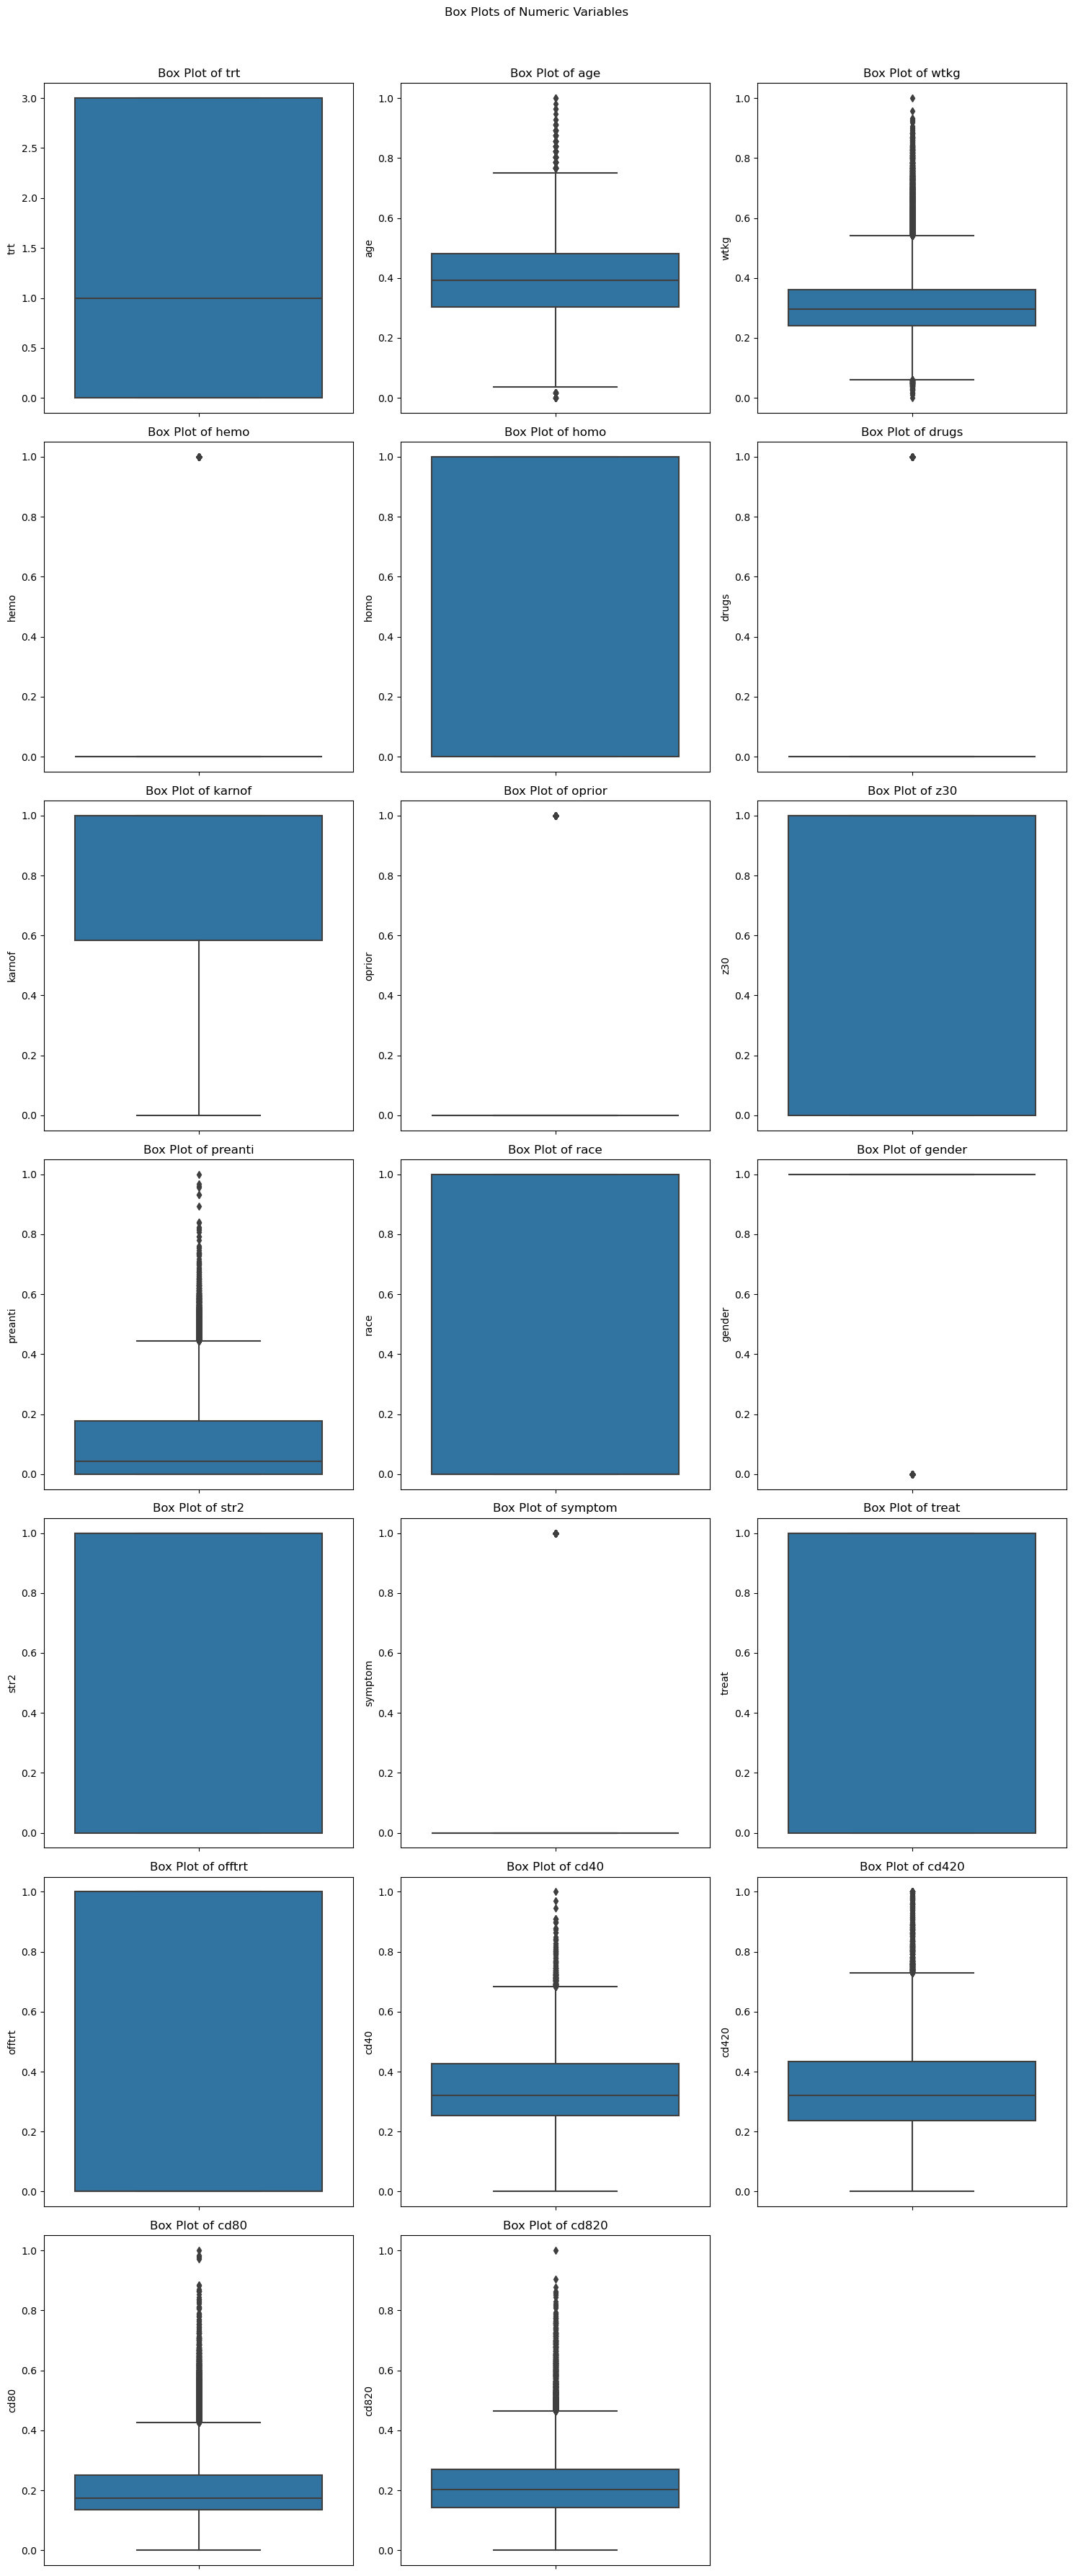

In [164]:
# Box Plots
num_columns = len(numeric_data.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=numeric_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.suptitle('Box Plots of Numeric Variables', y=1.02)
plt.show()

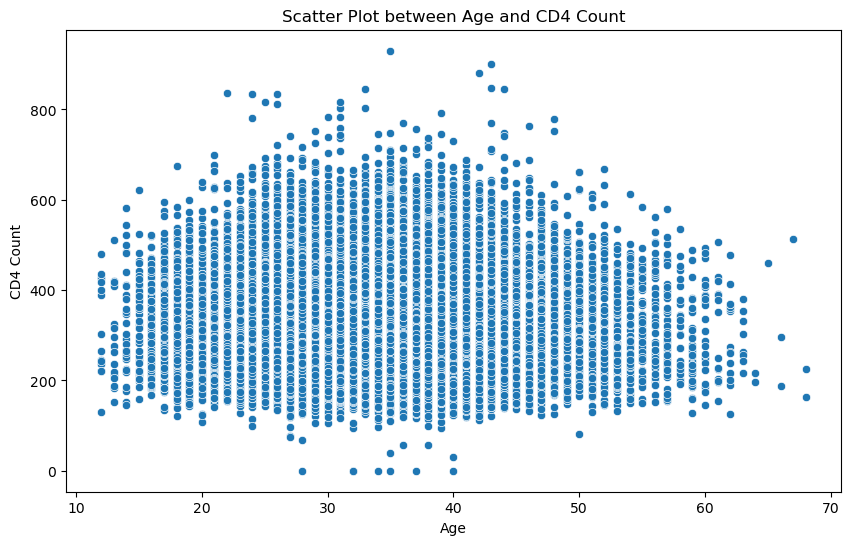

In [165]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cd40', data=data)
plt.title('Scatter Plot between Age and CD4 Count')
plt.xlabel('Age')
plt.ylabel('CD4 Count')
plt.show()

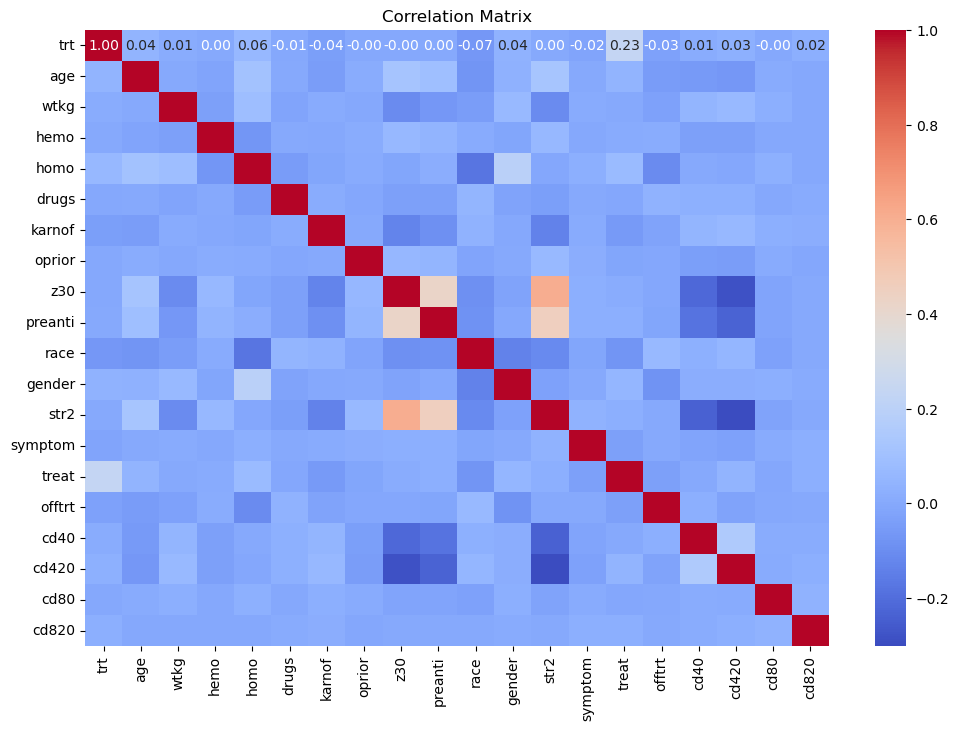

In [166]:
# Correlation Matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

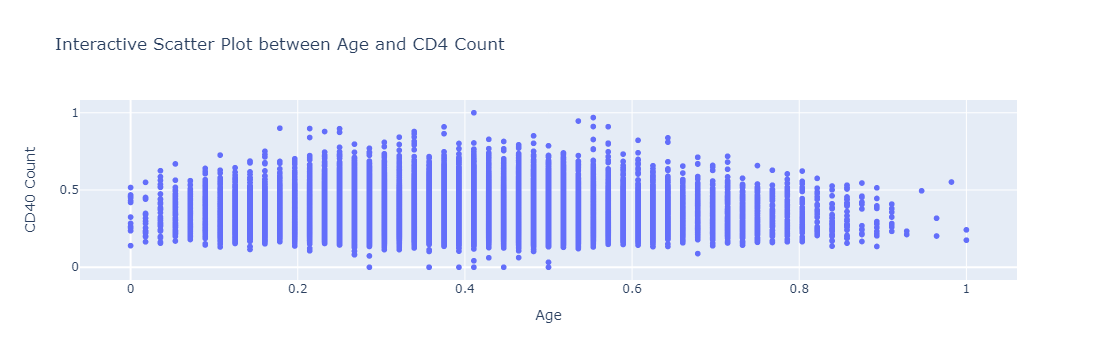

In [167]:
# Interactive Scatter Plot with Plotly
fig = px.scatter(df_cleaned, x='age', y='cd40', title='Interactive Scatter Plot between Age and CD4 Count', labels={'age': 'Age', 'cd40': 'CD40 Count'})
fig.show()


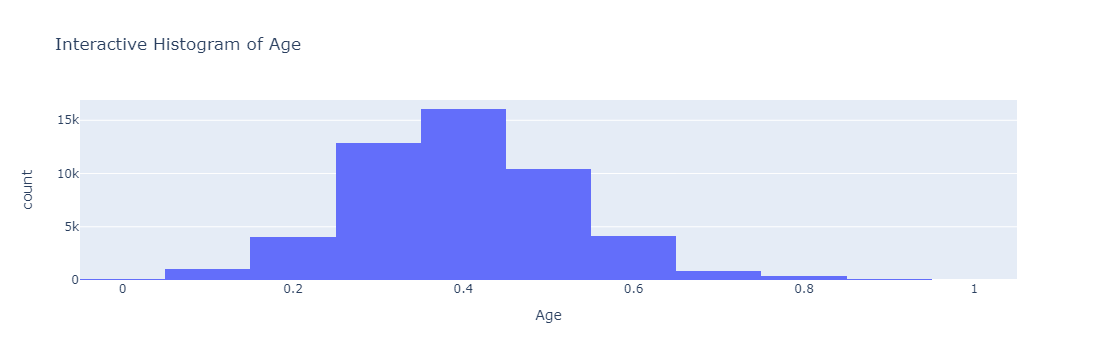

In [168]:
# Interactive Histogram for Age with Plotly
fig = px.histogram(df_cleaned, x='age', nbins=20, title='Interactive Histogram of Age', labels={'age': 'Age'})
fig.show()

# **Hypothesis Testing**

## T-Test Statistics

In [169]:
#'trt' column represents the treatment group
treatment_groups = df_cleaned['trt'].unique()

# Perform t-test between each pair of treatment groups
results = {}
for i in range(len(treatment_groups)):
    for j in range(i+1, len(treatment_groups)):
        group1 = df_cleaned[df_cleaned['trt'] == treatment_groups[i]]['cd40']
        group2 = df_cleaned[df_cleaned['trt'] == treatment_groups[j]]['cd40']
        t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
        results[f'{treatment_groups[i]} vs {treatment_groups[j]}'] = (t_stat, p_val)

print("t-test results for CD40 counts between treatment groups:")
for comparison, result in results.items():
    print(f'{comparison}: t-statistic = {result[0]:.3f}, p-value = {result[1]:.3f}')

t-test results for CD40 counts between treatment groups:
1 vs 0: t-statistic = 3.392, p-value = 0.001
1 vs 3: t-statistic = 0.311, p-value = 0.756
1 vs 2: t-statistic = 2.853, p-value = 0.004
0 vs 3: t-statistic = -3.789, p-value = 0.000
0 vs 2: t-statistic = -0.272, p-value = 0.785
3 vs 2: t-statistic = 3.042, p-value = 0.002


## Chi-Square Test

In [170]:
# Categorizing Karnofsky scores
data['karnof_category'] = pd.cut(data['karnof'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data['symptom'], data['karnof_category'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print("Chi-Square Test results for Symptom and Karnofsky Score Category:")
print(f'Chi-Square statistic = {chi2_stat:.3f}, p-value = {p_val:.3f}')

Chi-Square Test results for Symptom and Karnofsky Score Category:
Chi-Square statistic = 0.082, p-value = 0.774


# **Advanced Analysis**

In [176]:
columns_to_drop = ['time']  # Replace with actual column names

# Drop the specified columns
X.drop(columns=columns_to_drop,inplace=True)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  preanti  \
39087    0   29  74.00283     0     1      0      90       0    0      133   
30893    2   40  71.25909     0     1      1     100       0    1       13   
45278    2   37  55.06707     0     1      0     100       0    1      484   
16398    3   20  67.53315     0     0      1     100       0    0        0   
13653    0   35  71.68379     0     1      0     100       0    1      797   

       ...  gender  str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  \
39087  ...       1     1      3        0      1       0   283    255  1110   
30893  ...       1     1      1        0      1       0   195    202  1037   
45278  ...       1     1      3        0      1       0   430    575   745   
16398  ...       1     1      1        1      0       0   429    452  1075   
13653  ...       1     1      3        0      0       0   459    500   651   

       cd820  
39087    786  
30893    713  
45278    607  
16398    411  
13653   1404  

[5 rows x 21 columns]

## Logistic Regression

In [178]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.6986
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.81      6923
           1       0.53      0.21      0.30      3077

    accuracy                           0.70     10000
   macro avg       0.62      0.56      0.56     10000
weighted avg       0.66      0.70      0.65     10000

Confusion Matrix:
 [[6332  591]
 [2423  654]]


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Gradient Boosting Classifier

In [179]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier Accuracy: 0.7025
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81      6923
           1       0.54      0.21      0.30      3077

    accuracy                           0.70     10000
   macro avg       0.63      0.57      0.56     10000
weighted avg       0.67      0.70      0.65     10000

Confusion Matrix:
 [[6380  543]
 [2432  645]]


## Random Forest Classifier

In [180]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.6992
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      6923
           1       0.53      0.23      0.32      3077

    accuracy                           0.70     10000
   macro avg       0.63      0.57      0.56     10000
weighted avg       0.66      0.70      0.66     10000

Confusion Matrix:
 [[6288  635]
 [2373  704]]


### Here i tried three different models of classification to check who gives better result.